In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
import re
from datetime import datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import ast
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

from wordcloud import WordCloud, STOPWORDS

stop_words = nltk.corpus.stopwords.words("english")

sns.set_theme(style="darkgrid")

In [2]:
df_data  = pd.read_csv("Data/PreProData.csv")
df_geo = pd.read_csv("Data/location_geocode.csv")

Text(0.5, 1.0, 'Sentiment Distribution')

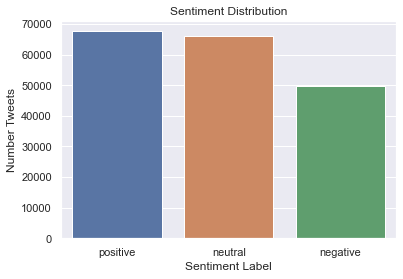

In [3]:
temp = dict(collections.Counter(list(df_data['sentiment_label'])))
p = sns.barplot(x = list(temp.keys()), y = list(temp.values()))
p.set_xlabel("Sentiment Label")
p.set_ylabel("Number Tweets")
p.set_title("Sentiment Distribution")



In [4]:
fig = go.Figure(go.Funnelarea(
    text = list(temp.keys()),
    values = list(temp.values()),
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<AxesSubplot:ylabel='Density'>

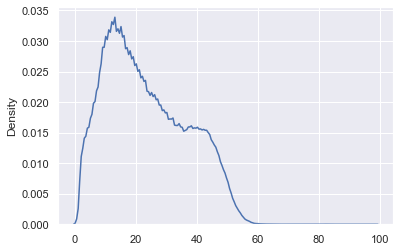

In [5]:
number_words = [ len([w for w in tw.split()]) for tw in list(df_data['tweet']) ]
df_data['number_words'] = number_words
sns.kdeplot(data=number_words, bw_adjust= .4)

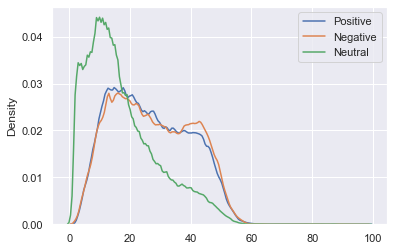

In [6]:
pos_tweets = df_data.loc[df_data['sentiment_label'] == 'positive']['tweet']
neg_tweets = df_data.loc[df_data['sentiment_label'] == 'negative']['tweet']
neu_tweets = df_data.loc[df_data['sentiment_label'] == 'neutral']['tweet']
pos_number_words = [ len([w for w in tw.split()]) for tw in pos_tweets ]
neg_number_words = [ len([w for w in tw.split()]) for tw in neg_tweets ]
neu_number_words = [ len([w for w in tw.split()]) for tw in neu_tweets ]
sns.kdeplot(data=pos_number_words, bw_adjust= .4, label = 'Positive')
sns.kdeplot(data=neg_number_words, bw_adjust= .4, label = 'Negative')
sns.kdeplot(data=neu_number_words, bw_adjust= .4, label = 'Neutral')
plt.legend(['Positive','Negative','Neutral'])
plt.show()



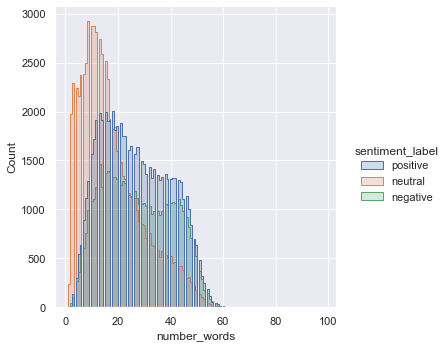

In [7]:
sns.displot(df_data, x = 'number_words', hue = 'sentiment_label', element = 'step')

In [8]:
number_emoji = [ len(ast.literal_eval(tw)) for tw in list(df_data['emojis']) ]
number_hash = [ len(ast.literal_eval(tw)) for tw in list(df_data['hashtags']) ]
number_tags = [ len(ast.literal_eval(tw)) for tw in list(df_data['tags']) ]
df_data['number_emoji'] = number_emoji
df_data['number_hash'] = number_hash
df_data['number_tags'] = number_tags

In [9]:
df_data.describe()

,likes,retweets,number_words,number_emoji,number_hash,number_tags
count,183370.000000,183370.000000,183370.000000,183370.000000,183370.000000,183370.000000
mean,11.159006,3.814310,23.499689,0.178442,2.043982,0.717587
std,118.324495,37.727466,13.260600,1.081006,1.907074,1.639487
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,21.000000,0.000000,2.000000,0.000000
75%,3.000000,1.000000,34.000000,0.000000,3.000000,1.000000
max,15559.000000,6622.000000,98.000000,112.000000,49.000000,50.000000


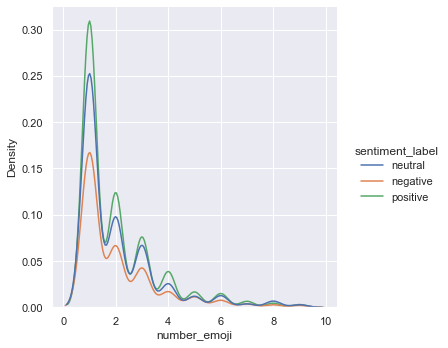

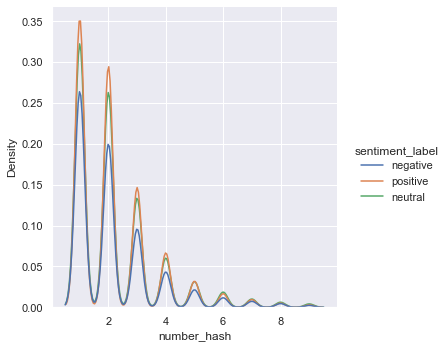

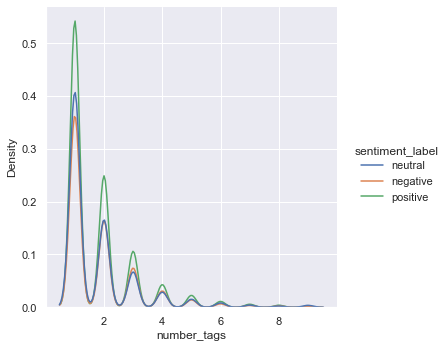

In [10]:
sns.displot(df_data.loc[(df_data['number_emoji'] > 0)].loc[df_data['number_emoji'] < 10], x="number_emoji", hue="sentiment_label",  kind ='kde')
sns.displot(df_data.loc[(df_data['number_hash'] > 0)].loc[df_data['number_hash'] < 10], x="number_hash", hue="sentiment_label",  kind ='kde')
sns.displot(df_data.loc[(df_data['number_tags'] > 0)].loc[df_data['number_tags'] < 10], x="number_tags", hue="sentiment_label",  kind ='kde')

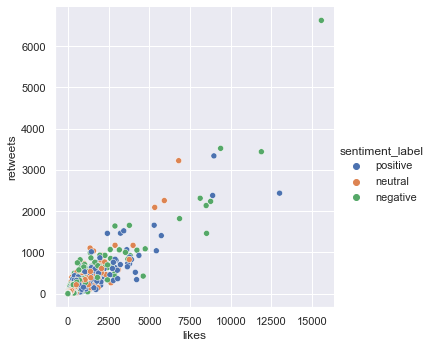

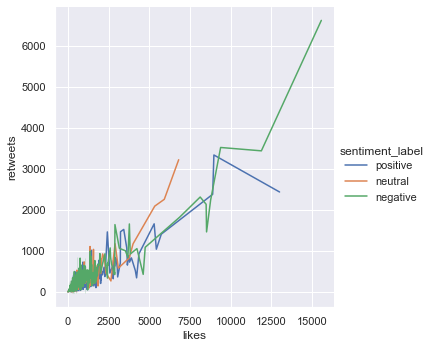

In [11]:
sns.relplot(data = df_data, x="likes", y="retweets", hue="sentiment_label");
sns.relplot(data = df_data, x="likes", y="retweets", hue="sentiment_label",kind = 'line', ci = 'sd');

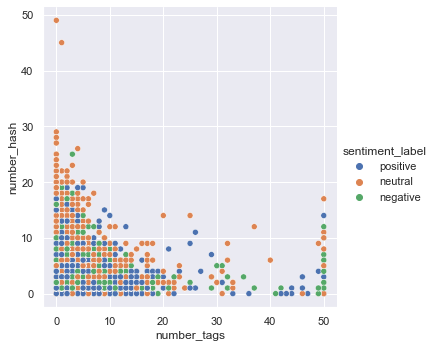

In [12]:
sns.relplot(data = df_data, x="number_tags", y="number_hash", hue="sentiment_label");

In [13]:
stemmer = EnglishStemmer()

def remove_stop_words(doc):
    words = doc.split()
    words = [word for word in words if not word in stop_words]
    #words =  [word for word in words if word.isalnum()]
    processed_text = " ".join(words)
    return processed_text

def remove_emojis(doc):
    return emoji_pattern.sub(r'', doc)

def remove_url(doc):
    return re.sub(r'http\S+', '',doc)

def remove_hashsymbol(doc):
    return doc.replace('#',"")


analyzer = CountVectorizer().build_analyzer()
def stemming(doc):
    return " ".join([stemmer.stem(w) for w in analyzer(doc)]
    )

#Comment the ones you dont want to use. I don't know what is the best option
def tweet_preprocess(doc):
   text_temp = doc
   text_temp = remove_url(text_temp)
   text_temp = remove_emojis(text_temp)
   text_temp = remove_hashsymbol(text_temp)
   text_temp = remove_stop_words(text_temp)
   text_temp = stemming(text_temp)
   return text_temp


In [14]:
tweet_prepro = [tweet_preprocess(tw) for tw in list(df_data['tweet'])]

In [15]:
df_data["tweet_prepro"] = tweet_prepro

We make wordclouds using the raw tweets and also the preprocessed tweets.

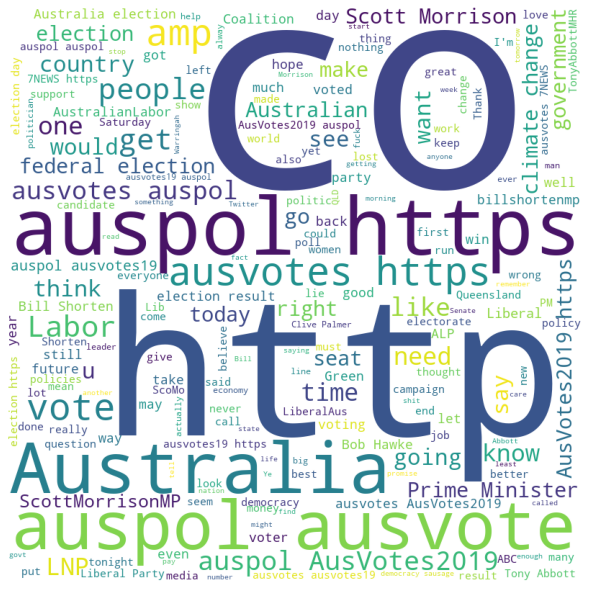

In [17]:
all_words = ""
for s in  list(df_data['tweet']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

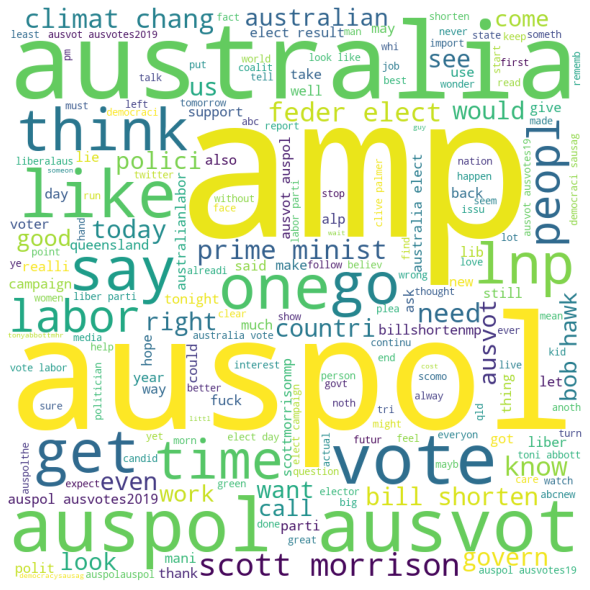

In [18]:
all_words = ""
for s in  list(df_data['tweet_prepro']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

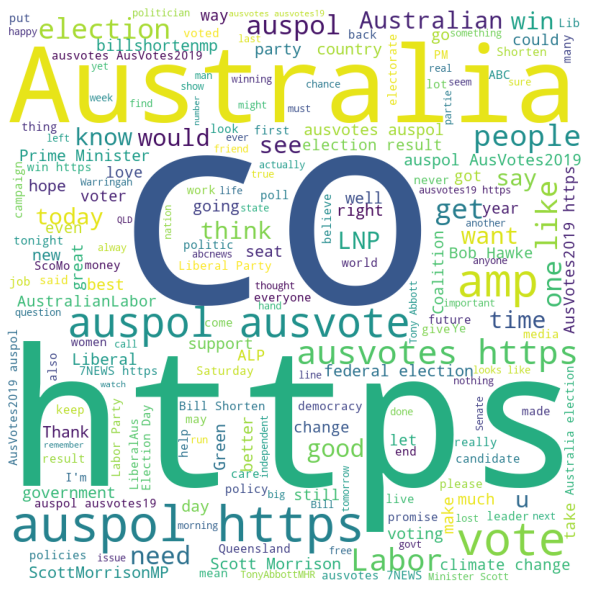

In [19]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'positive'] ['tweet']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'positive'] ['tweet_prepro']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

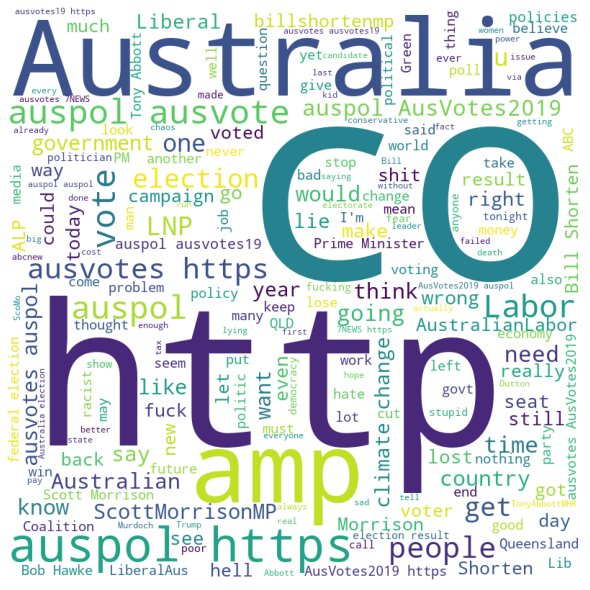

In [20]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'negative'] ['tweet']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

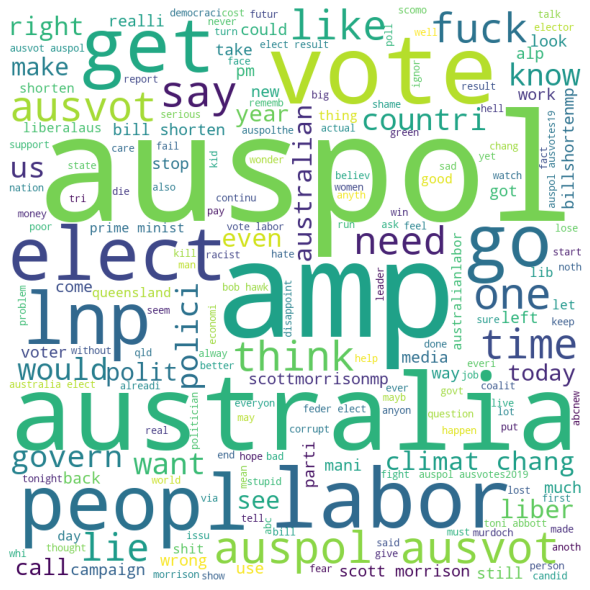

In [21]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'negative'] ['tweet_prepro']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)